# 주성분 분석 PCA, Principal Component Analysis

- 데이터 집합 내에 존재하는 각 데이터의 차이를 가장 잘 나타내 주는 요소(Component)를 찾아 내는 방법이다.

- 통계 데이터 분석(주성분 찾기), 데이터 압축(차원감소), 노이즈 제거 등 다양한 분야에서 사용<br></br>

- __차원축소__(dimensionality reduction):

	데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아,

	고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법<br></br>

- __변수추출__(feature extraction):

	기존 변수를 조합해 새로운 변수를 만드는 기법<br></br>

## --▶ 데이터 생성

- 간단하게 numpy를 이용해 데이터를 생성한다.

In [24]:
import numpy as np

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
X.shape

(200, 2)

In [7]:
rng.rand(2, 2) #--> [2 by 2], 0과 1 사이의 균일 분포(uniform distribution)에서 무작위로 추출한 값

array([[0.60735693, 0.79695268],
       [0.81266616, 0.26598051]])

In [8]:
rng.randn(2,200) #--> [2 by 200], 표준 정규 분포(평균이 0이고 표준 편차가 1인 정규 분포)에서 무작위로 추출한 값

array([[-2.23305285e+00,  1.42026788e-01,  7.42047827e-01,
         1.11144113e+00,  4.49767208e-01, -1.43039670e+00,
         9.42539772e-01, -5.35146593e-01, -4.58967168e-01,
         1.15152877e+00, -1.97741771e+00,  2.23864876e+00,
         9.00084997e-01,  8.89032373e-01, -1.52296574e-01,
         7.04626895e-01,  6.12955068e-01,  2.39663182e-01,
        -1.51202147e+00,  4.44697716e-01,  2.53220525e-01,
         9.40787068e-01,  4.17302320e-01,  2.69558553e-01,
         1.68721062e-01, -1.48895017e+00, -1.85526666e+00,
        -1.10321722e-01, -7.04604762e-01,  4.55318527e-01,
        -1.22067190e+00, -5.65046518e-01,  7.06188812e-01,
         5.04389807e-03, -8.73259179e-01,  5.56018081e-01,
         2.67381976e-01, -1.03193483e+00, -6.35903189e-01,
         1.99779097e-01, -1.96516643e-01, -2.64890894e-01,
        -5.36168707e-01, -2.69395632e+00,  4.81339952e-01,
         3.08090862e-01, -1.37528268e-01, -1.80036570e+00,
        -4.19985810e-01, -2.85337341e-02, -2.31813179e-0

In [9]:
np.dot(rng.rand(2,2), rng.randn(2,200)) #--> [2 by 2] X [2 by 200] 행렬 곱(dot product)

array([[-1.11411586,  0.26963063, -2.35812802, -1.10004702,  0.46583063,
        -2.12906763, -0.73210845, -0.10302759,  0.87991633, -0.48262294,
         0.49694768,  0.86354217,  1.02783004, -1.34637398, -0.63360084,
        -3.48194222,  0.26604072,  2.28267876,  0.42487386, -0.18130613,
         2.92420852, -0.09232165, -0.35120922, -2.1405561 ,  1.00122665,
        -1.19315761, -3.30940444, -0.11310033,  1.01441755,  0.78652888,
         0.216239  ,  0.43682089, -0.14747937, -1.13262489,  0.72038809,
        -1.50794986, -0.26950997, -0.85860048, -0.43241083,  0.03590573,
        -1.97446368,  1.19954766, -1.1116624 , -0.22250036,  1.43785591,
        -1.19968802, -0.07788353, -1.53661428, -1.16990296,  0.82191515,
        -1.25755635, -2.01660382, -0.48451116, -0.13659498,  0.4749367 ,
         1.83708934, -1.62582005,  0.41116729,  1.04228831,  0.54256123,
         1.19986809, -0.08778205,  2.06272437, -1.77843795, -0.22920475,
         1.0142905 ,  0.17851719,  0.43729217, -1.4

In [10]:
np.dot(rng.rand(2,2), rng.randn(2,200)).T

array([[-2.28478921e-02,  9.98220980e-02],
       [ 6.26843943e-02,  5.08199149e-01],
       [-9.15775547e-03,  1.43004254e-01],
       [ 1.08357047e-01,  5.21287747e-01],
       [ 3.18639721e-01,  1.50584498e+00],
       [ 4.39035661e-02,  1.75800181e-01],
       [ 1.65759856e-01,  1.26413798e+00],
       [ 1.39512003e-01,  3.03500008e-01],
       [ 1.07364087e-01,  7.22648825e-01],
       [ 3.67954875e-03,  2.96429845e-01],
       [-2.85002894e-02, -1.66452547e-02],
       [-2.68609918e-01, -1.82158930e+00],
       [ 1.30235661e-01,  6.10931949e-01],
       [ 1.72393858e-01,  7.99085325e-01],
       [ 1.10895839e-01,  3.02927327e-01],
       [ 1.15299553e-01,  3.81756809e-01],
       [-2.61271142e-01, -1.29111825e+00],
       [ 1.74380941e-01,  9.56036747e-01],
       [-2.26236973e-01, -1.21757831e+00],
       [ 1.10519848e-01,  6.26545042e-01],
       [-6.08167844e-02, -5.68216213e-01],
       [ 1.27479968e-01,  1.12766246e+00],
       [-2.06363658e-01, -1.36233465e+00],
       [-5.

## --▶ 데이터 확인 : scatter

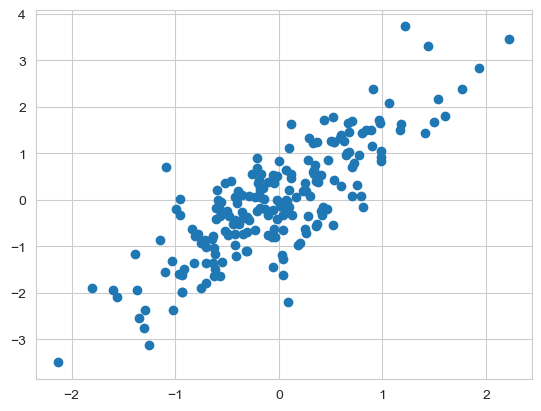

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.scatter(X[:,0], X[:,1]);

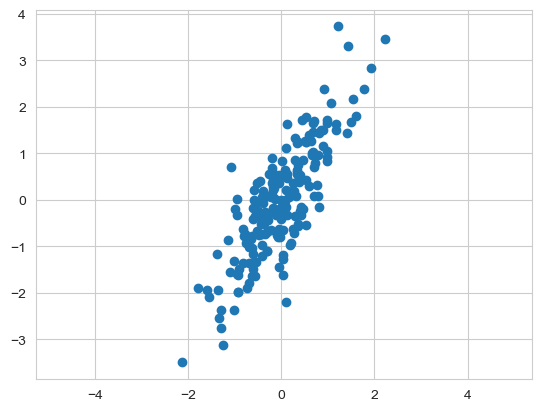

In [12]:
plt.scatter(X[:,0], X[:,1]);
plt.axis('equal')
plt.show()

## --▶ 주성분 분석

- `n_components=2` - 2개의 주성분으로 표현해달라는 의미

- 데이터를 설명하는 두 개의 성분을 벡터로 나타낸다.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [26]:
pca.components_ #--> 주성분 벡터값

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [27]:
pca.explained_variance_ #--> 분산값 : 주성분 벡터값의 설명력 (데이터를 얼마나 잘 설명하고 있는 값인지에 대한 값)

array([1.82531406, 0.13209947])

In [28]:
pca.explained_variance_ratio_ #--> 주성분 첫번째 벡터[0.47802511, 0.87834617]에 의한 설명력이 93.25%로 아주 높다.

array([0.93251326, 0.06748674])

In [29]:
pca.mean_

array([-0.03360413, -0.03527382])

## --▶ 주성분 확인 : vector

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrow_props = dict(
		arrowstyle = '->',
		linewidth = 2,
		color = 'black',
		shrinkA = 0,
		shrinkB = 0
	)
    ax.annotate("", v1, v0, arrowprops=arrow_props)

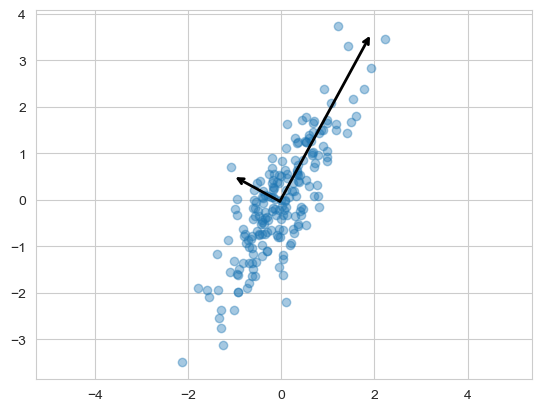

In [18]:
plt.scatter(X[:,0], X[:,1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) * 3 #--> 설명력을 벡터의 길이로 표현한다.
    draw_vector(pca.mean_, pca.mean_ + v) #--> pca.mean_을 원점으로 잡는다.

plt.axis('equal')
plt.show()

## --▶ 주성분 분석 2.

- `n_components=1`로 한 번 더 시도

In [31]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_[0]*100, "%")

[[0.47802511 0.87834617]]
[1.82531406]
93.25132559616173 %


In [32]:
X_pca = pca.transform(X) #--> 데이터를 1차원으로 형태를 변경
X_pca.shape

(200, 1)

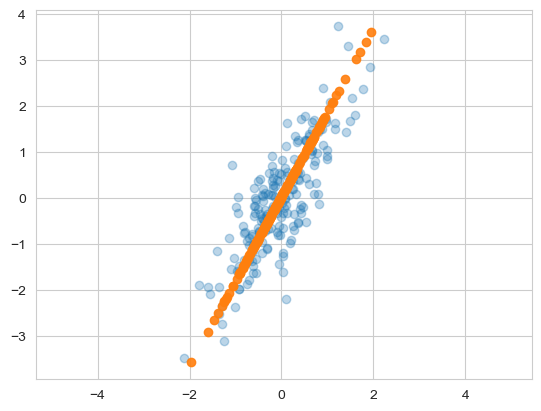

In [33]:
X_new_comp = pca.inverse_transform(X_pca) #--> 다시 주성분이 하나인 2차원 데이터로 환원시킴

plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(X_new_comp[:,0], X_new_comp[:,1], alpha=0.9)
plt.axis('equal')
plt.show()
#--> 어쩌면 Linear Regression과 같은 결과일지도...